# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble("PED00156e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.top.pdb'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x242ca26bf10>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x242ca47fe50>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x242ca48fdc0>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x242bc7fc790>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x242ca48f580>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x242ca48f940>}

## Featurization

In [5]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52', 

{'PED00156e001': array([[0.5999631 , 0.89660156, 0.85636204, ..., 0.5525146 , 0.9016362 ,
         0.66389084],
        [0.6889571 , 0.97671896, 1.2990081 , ..., 0.5429223 , 0.6213359 ,
         0.6238667 ],
        [0.59884906, 0.88192743, 1.1411959 , ..., 0.602543  , 0.93398833,
         0.6056949 ],
        ...,
        [0.6705319 , 0.72761977, 1.086409  , ..., 0.5999372 , 0.82545555,
         0.7310315 ],
        [0.61903375, 0.9297189 , 0.8547888 , ..., 0.64884263, 0.8961979 ,
         0.54602325],
        [0.6889359 , 0.8382031 , 0.8125406 , ..., 0.581274  , 0.67564696,
         0.66522956]], dtype=float32),
 'PED00157e001': array([[0.72870916, 1.0034786 , 1.3461812 , ..., 0.6067697 , 0.9241507 ,
         0.5852684 ],
        [0.5319525 , 0.56629866, 0.5666019 , ..., 0.56323797, 0.6581481 ,
         0.52826834],
        [0.61800283, 0.75487244, 1.1362286 , ..., 0.6893379 , 0.95195794,
         0.69387543],
        ...,
        [0.54582435, 0.49090427, 0.54887784, ..., 0.6870712 ,

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 1653)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 10
Best Number of Clusters: 4


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[  3.2736597 ,  21.269066  ],
       [  9.413996  ,  22.367985  ],
       [  3.8985481 , -44.687496  ],
       [  3.5416937 ,   7.949215  ],
       [ 21.798532  , -16.993876  ],
       [ 22.238075  , -23.211508  ],
       [ -1.4787118 ,  26.44043   ],
       [ 19.015808  ,   9.959524  ],
       [  6.4464445 ,  27.149649  ],
       [  2.0148602 , -45.891945  ],
       [  5.476517  ,  25.226206  ],
       [  0.5204613 , -22.941431  ],
       [  6.942795  , -20.473186  ],
       [  2.657906  ,  25.193731  ],
       [  1.1783221 , -52.084805  ],
       [  9.037458  , -31.2622    ],
       [  1.5208745 ,  27.573242  ],
       [ 10.263046  ,  24.163507  ],
       [ -9.098538  , -18.822794  ],
       [  5.4338794 ,  29.512466  ],
       [ -3.1413777 , -48.14536   ],
       [  2.0973914 , -50.26957   ],
       [ -8.432394  ,  25.630716  ],
       [  4.029047  ,   2.704361  ],
       [  4.086794  ,   0.34609255],
       [  3.333099  ,  27.978977  ],
       [  0.13755362,  25.400593  ],
 

## Analysis

In [7]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_density(save=True)

This analysis is only valid for t-SNE reduction with phi_psi feature extraction.


In [8]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[-1.4553086 ,  0.88359326, -1.9306248 , ...,  1.3748107 ,
          1.2376094 ,  2.4155958 ],
        [-2.7043009 , -2.3434737 , -1.58875   , ...,  2.1431072 ,
         -1.0010816 , -1.2415638 ],
        [ 1.1287941 , -1.4337806 ,  1.2556034 , ...,  1.7891169 ,
          1.4266781 ,  1.6607141 ],
        ...,
        [ 1.2122136 , -1.4770154 ,  1.0975671 , ...,  1.4069481 ,
         -1.2028154 ,  2.8511448 ],
        [-1.5651    , -3.0208209 , -1.2650225 , ...,  1.5895705 ,
          2.573668  , -0.7422657 ],
        [-1.6880546 ,  1.1844345 ,  1.423533  , ...,  1.7675475 ,
         -0.30371064,  1.909424  ]], dtype=float32),
 'PED00157e001': array([[-2.521464  , -1.5151354 , -2.0659232 , ...,  2.7251158 ,
          1.9867629 , -0.87243545],
        [-1.262894  , -1.1541845 , -1.6975888 , ...,  2.9208431 ,
         -0.5448182 , -0.3118794 ],
        [-1.9593301 , -1.8412713 , -2.6335168 , ..., -0.7722754 ,
         -2.8701572 ,  2.3355854 ],
        ...,
       

array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (clustering labels)'}>,
       <Axes: title={'center': 'Scatter plot (end_to_end labels)'}>,
       <Axes: title={'center': 'Density Plot'}>], dtype=object)

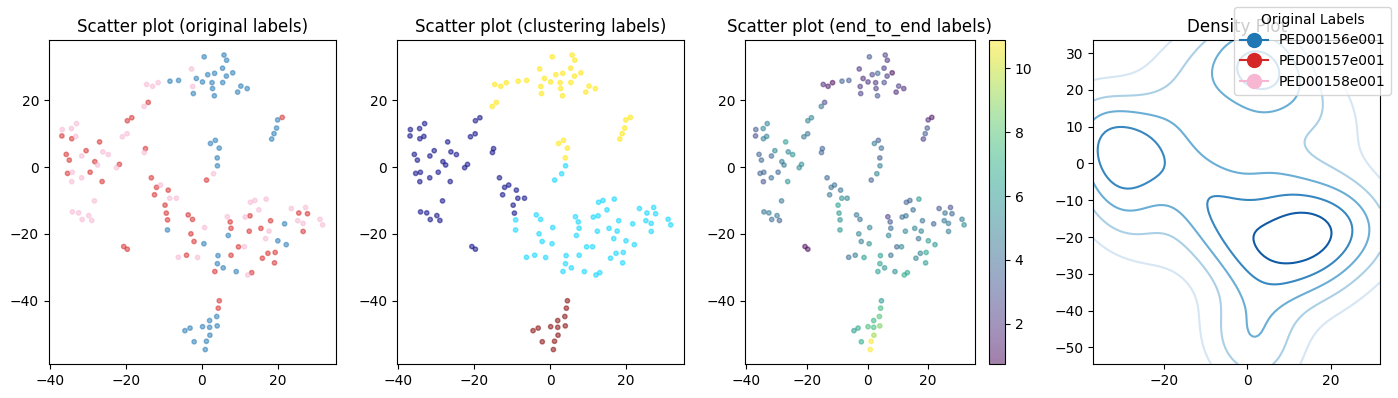

In [9]:
visualization.tsne_scatter(color_by="end_to_end", save=False)

In [10]:
visualization.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\tsne.pdf


In [11]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\custom_report.pdf
